## Stock price prediction - NVIDIA (LSTM)

In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
# Step 1: Load NVIDIA stock data
nvda = yf.Ticker("NVDA")
data = nvda.history(period="max")

In [12]:
# Step 2: Preprocess Data (Normalize the data using MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0,1))  # Scale between 0 and 1
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [13]:
# Step 3: Split Data into Training and Test Sets
training_data_len = int(np.ceil(0.8 * len(scaled_data)))  # 80% for training

train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 60:]  # last 60 days of training included for sequence

In [14]:
# Step 4: Create Training Sequences
sequence_length = 60  # Number of past days to consider
X_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train to 3D array as LSTM expects 3D input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Step 5: Create Test Sequences
X_test = []
y_test = data['Close'][training_data_len:].values  # Actual close prices for the test set

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])

X_test = np.array(X_test)

# Reshape X_test to 3D array as LSTM expects
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Step 6: Build the LSTM Model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(units=25))

# Output layer
model.add(Dense(units=1))

In [18]:
# Step 7: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Step 8: Train the Model
model.fit(X_train, y_train, batch_size=1028, epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 237ms/step - loss: 1.0899e-06
Epoch 2/20
5/5 [==============================] - 1s 245ms/step - loss: 1.2188e-06
Epoch 3/20
5/5 [==============================] - 1s 236ms/step - loss: 1.1635e-06
Epoch 4/20
5/5 [==============================] - 1s 235ms/step - loss: 1.1210e-06
Epoch 5/20
5/5 [==============================] - 1s 235ms/step - loss: 1.1131e-06
Epoch 6/20
5/5 [==============================] - 1s 242ms/step - loss: 1.1420e-06
Epoch 7/20
5/5 [==============================] - 1s 235ms/step - loss: 1.1020e-06
Epoch 8/20
5/5 [==============================] - 1s 243ms/step - loss: 9.3295e-07
Epoch 9/20
5/5 [==============================] - 1s 270ms/step - loss: 1.1786e-06
Epoch 10/20
5/5 [==============================] - 2s 330ms/step - loss: 1.0460e-06
Epoch 11/20
5/5 [==============================] - 1s 288ms/step - loss: 1.0337e-06
Epoch 12/20
5/5 [==============================] - 2s 321ms/step - loss: 1.0980e-06
E

In [36]:
# Step 9: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Scale back to original price

41/41 [==============================] - 0s 11ms/step


C:\Users\Samudhitha\AppData\Local\Temp\ipykernel_312\4153373918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


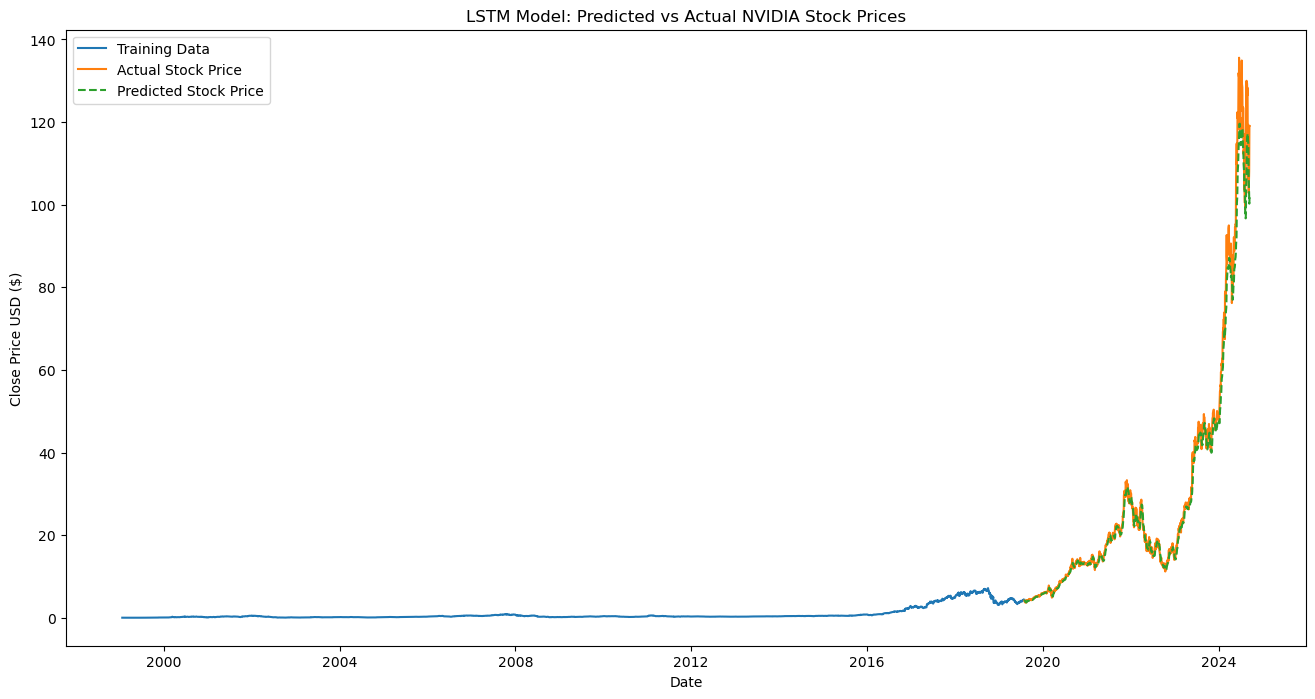

In [37]:
# Step 10: Visualize the Results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plot the actual vs predicted prices
plt.figure(figsize=(16,8))
plt.title('LSTM Model: Predicted vs Actual NVIDIA Stock Prices')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Stock Price')
plt.plot(valid['Predictions'], label='Predicted Stock Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='best')
plt.show()

In [38]:
# Step 11: Calculate Performance Metrics (MSE, RMSE, MAE)
mse = mean_squared_error(valid['Close'], valid['Predictions'])
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 13.067283718127571
Mean Absolute Error (MAE): 1.7818823622178661
Root Mean Squared Error (RMSE): 3.614869806525205
